In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import scipy.stats as stats
import statsmodels.api as sm

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
pd.set_option('display.max_rows', None)

# Datasets

In [3]:
data = pd.read_csv("data_clean.csv")
data_sign_up = pd.read_csv("data_sign_up.csv")
data_small = pd.read_csv("data_small.csv")

data_to_model = pd.read_csv("data_to_model.csv")

This the plan of the notebook :

# Data descreption

In [14]:
data.head()

,iid,gender,condtn,wave,round,order,pid,match,int_corr,samerace,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,from_c
0,1,0,1,1,10,4,11,0,0.14,0,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,49.0
1,1,0,1,1,10,3,12,0,0.54,0,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,49.0
2,1,0,1,1,10,10,13,1,0.16,1,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,49.0
3,1,0,1,1,10,5,14,1,0.61,0,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,49.0
4,1,0,1,1,10,7,15,1,0.21,0,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,49.0


In [15]:
print(data.shape)

(8378, 191)


It appears that our dataset contains a total of 191 columns. This is a substantial number of variables, and it highlights the complexity and richness of the data that we are working with. We may need to perform data preprocessing and feature selection to find the most relevant variables.

### Null values

<AxesSubplot: >

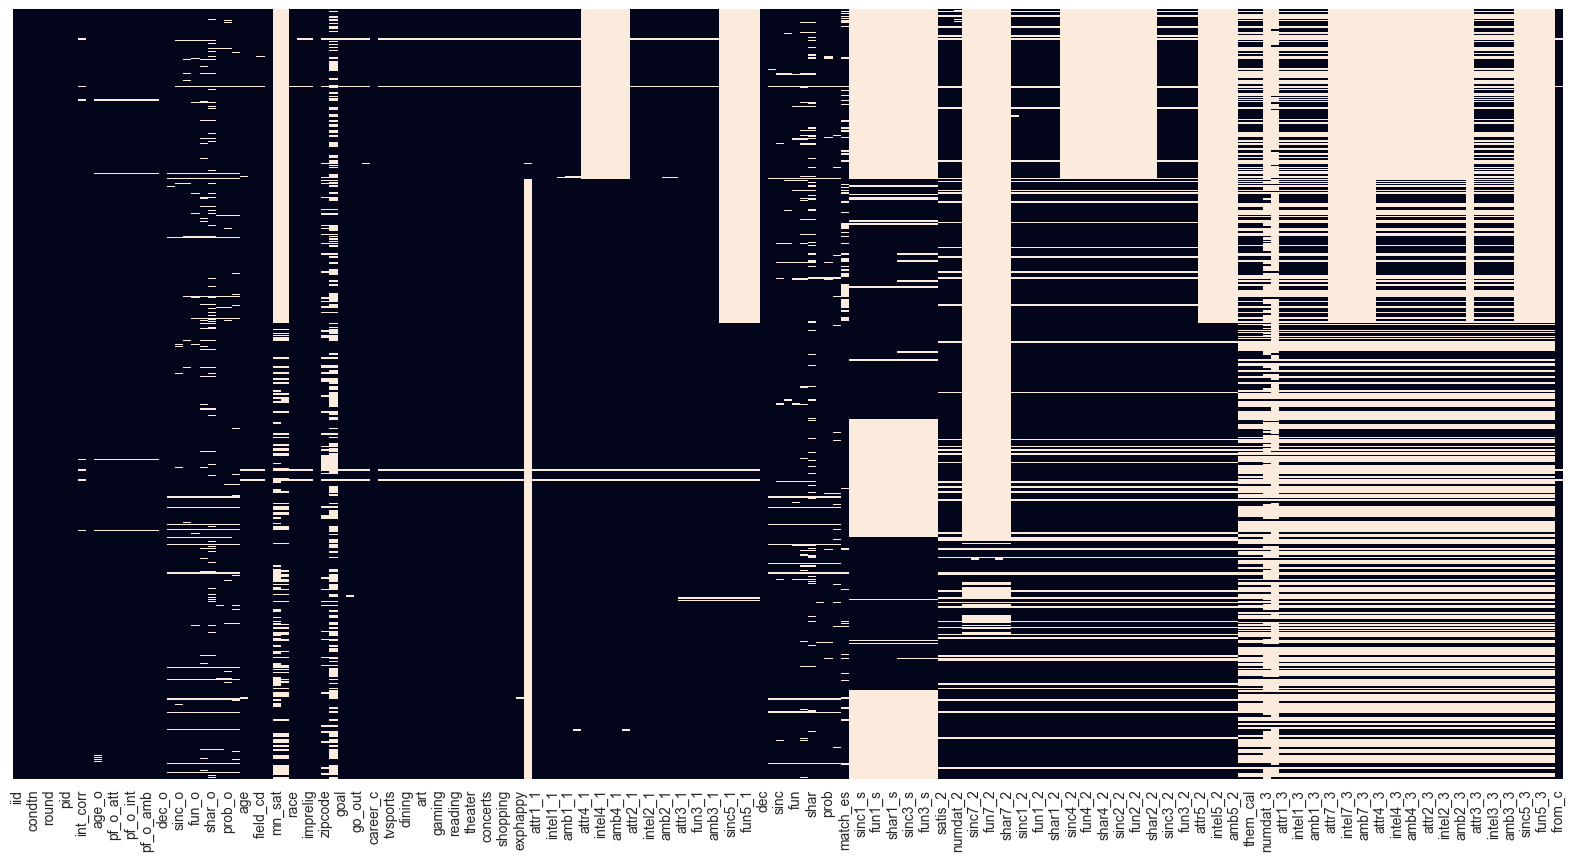

In [16]:
plt.subplots(figsize=(20, 10))
sns.heatmap(data.isnull(),yticklabels=False, cbar = False)

The above graph shows the proportion of null values in each columns in the dataset. The more white the more null values.

Upon inspection of the graph, we can observe a notable presence of null values, particularly in variables collected during the two follow-up surveys conducted after the dating events. It appears that a considerable proportion of participants did not complete these surveys, resulting in missing data in those variables.

To address this issue, we have opted to employ a data preprocessing strategy that involves removing columns with a null value percentage exceeding 20%. This approach allows us to mitigate the impact of missing data on our subsequent analyses while retaining a sufficient number of variables for meaningful insights.

As a result of this process, we have generated a new dataset, which we have named **"data_small.csv"**. By leveraging this refined dataset, we can potentially obtain more accurate and reliable results in our future analyses.

**Note** : You can find the code used to create **"data_small.csv"** and all other cutom datasets that we created in **"Data preprocessing.ipynb"**.

### Categorical VS numerical variables

In [17]:
id_variables = ["iid", "pid"]

In [18]:
categorical_variables = ['gender', 'condtn', 'wave','match', 'samerace', 'dec_o', 'field', 'undergra', 'from','from_c',
                         'career', 'dec', 'race_o','met_o','field_cd', 'race', 'imprace', 'imprelig', 'zipcode', 'goal', 'date',
                         'go_out', 'career_c','met',"numdat_2"]

In [19]:
numerical_variables = ['round','order','int_corr', 'age_o','pf_o_att', 'pf_o_sin', 'pf_o_int',
       'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o',
       'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o',"age",'sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
       'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1',
       'shar1_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1',
       'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr',
       'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob','match_es','length','satis_2','attr1_2', 'sinc1_2',
       'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2', 'attr3_2', 'sinc3_2',
       'intel3_2', 'fun3_2', 'amb3_2']

In [20]:
print("Number of categorical variables:", len(categorical_variables))
print("Number of numerical variables:", len(numerical_variables))

Number of categorical variables: 25
Number of numerical variables: 76


## focus on the "match" variable

The variable "match" is the variable to be explained in our study, 0 means the two participants didn't match and 1 means they matched and they are willing
to go on another date.

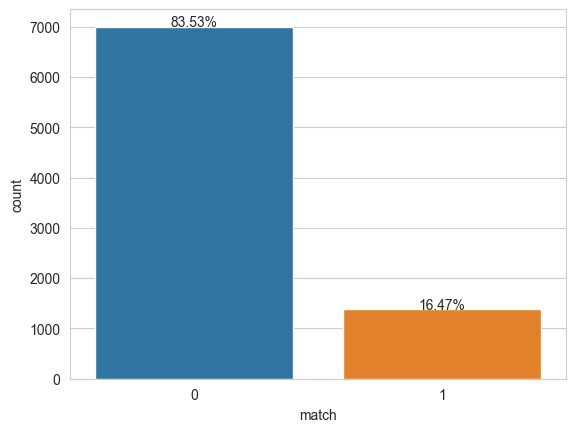

In [19]:
ax = sns.countplot(x='match', data=data_small)
total = float(len(data_small))

# Add percentages to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+3, '{:.2f}%'.format((height/total)*100), ha="center")

# Show the plot
plt.show()

Only 16% if the dates lead to a match this not only means that it's hard to find a match but more importantly we have unbalanced data !! The baseline model for predecting match have an accuracy of 83.53.

## focus on the "dec" variable

## focus on the "gender" variable

In [20]:
num_males = len(data[data["gender"] == 1]["iid"].unique()); num_males

277

In [21]:
num_females = len(data[data["gender"] == 0]["iid"].unique()); num_females

274

The number of women and men who participated in the experiement are close; 277 man and 274 women.

In [22]:
data.groupby("gender")["dec"].mean()

gender
0    0.365440
1    0.474249
Name: dec, dtype: float64

males says yes more (47% of the time vs 36% for women)

## Impact of order on the probability of having a second date

In [23]:
data_order = data[["iid","wave","gender",'dec','order']]
                          
list_wave = data[data['condtn']==2]['wave'].unique().tolist()
dict_wave_order = {}
for i in list_wave:
    dict_wave_order[f"wave_{i}"] = data_order[data_order["wave"] == i]
    

In [24]:
for i in list_wave:
    dict_wave_order[f"wave_{i}"]['order'] =  dict_wave_order[f"wave_{i}"]['order']/(max(dict_wave_order[f"wave_{i}"]['order'].unique()))

C:\Users\21262\AppData\Local\Temp\ipykernel_1876\1841317223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dict_wave_order[f"wave_{i}"]['order'] =  dict_wave_order[f"wave_{i}"]['order']/(max(dict_wave_order[f"wave_{i}"]['order'].unique()))


In [25]:
concatenated_dOrder = pd.concat([dict_wave_order[f"wave_{i}"] for i in list_wave], axis=0)

### Important of order for women 

In [26]:
pl = (concatenated_dOrder[concatenated_dOrder["gender"]==0].groupby("order")["dec"].mean()).to_frame().reset_index()
L_order=[(0,0.05),(0.05,0.2),(0.2,0.6),(0.6,0.8),(0.8,1)]
hist_order = [pl[(pl['order']>=L_order[i][0]) & (pl['order']<L_order[i][1]) ]['dec'].mean() for i in range(len(L_order))]

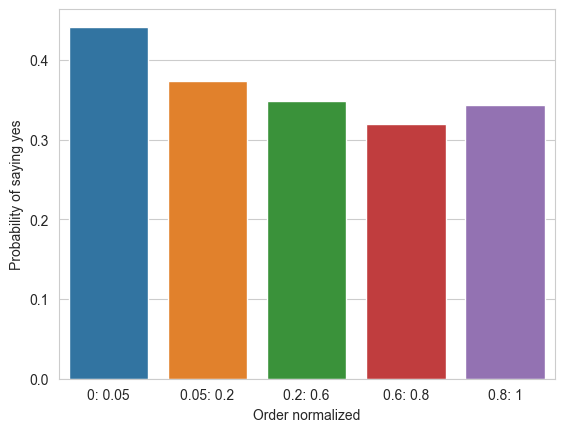

In [27]:
formatter = lambda x: f"{x[0]} to {x[1]}"
sns.barplot(x=list(map(formatter, L_order)), y=hist_order)

plt.xlabel('Order normalized')
plt.ylabel('Probability of saying yes')

plt.show()

### Important of order for men 

In [28]:
plm = (concatenated_dOrder[concatenated_dOrder["gender"]==1].groupby("order")["dec"].mean()).to_frame().reset_index()
L_order=[(0,0.05),(0.05,0.2),(0.2,0.6),(0.6,0.8),(0.8,1)]
hist_orderm = [plm[(plm['order']>=L_order[i][0]) & (pl['order']<L_order[i][1]) ]['dec'].mean() for i in range(len(L_order))]

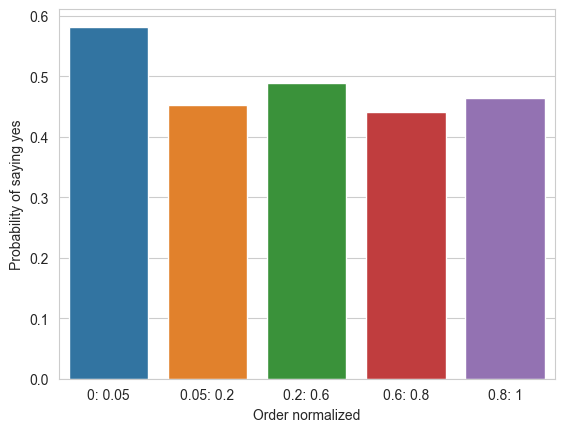

In [29]:
formatter = lambda x: f"{x[0]} to {x[1]}"
sns.barplot(x=list(map(formatter, L_order)), y=hist_orderm)

plt.xlabel('Order normalized')
plt.ylabel('Probability of saying yes')

plt.show()

We notice that both women and men say "yes" for the first dates more that those at the end of the event.

## focus on the "age" variable

In [30]:
data_sign_up["age"].describe()

count    543.000000
mean      26.359116
std        3.766960
min       18.000000
25%       24.000000
50%       26.000000
75%       28.000000
max       55.000000
Name: age, dtype: float64

The participants of the experiement were mostly colledge students, but we also have some older people. 
The ages ranges from 18 to 55.

<AxesSubplot: xlabel='age'>

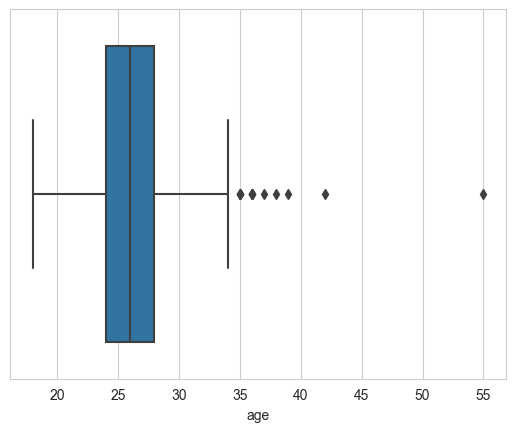

In [31]:
sns.boxplot(x=data_sign_up["age"])

Based on the box plot analysis, it is observed that the median age falls within the range of mid-twenties, with 50% of the participants belonging to this age group. Furthermore, 75% of the participants are below the age of 35, indicating a relatively young cohort. However, it is worth noting that there exist some outliers in the age distribution, with a few participants ranging from 35 to 55 years old.

## Focus on the variables : "race", "imprace", "samerace"

In [35]:
df = data_sign_up["race"].value_counts()/len(data_sign_up["race"])

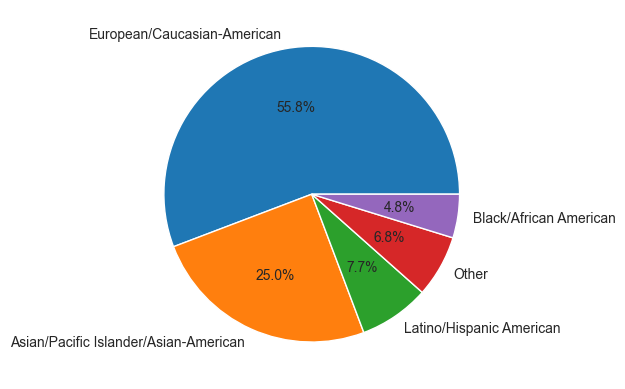

In [36]:
labels = ["European/Caucasian-American","Asian/Pacific Islander/Asian-American","Latino/Hispanic American","Other","Black/African American"]
plt.pie(df, labels=labels, autopct='%1.1f%%')
plt.show()

Only about 5% of the subjects are black, there are no native americans and the mojority are white

# Mining insights

## The effect of similarity 

In [50]:
from sklearn.metrics.pairwise import cosine_similarity

In [62]:
# data_similarity = data_sign_up[["age","iid","wave","gender",'sports',
#  'tvsports',
#  'exercise',
#  'dining',
#  'museums',
#  'art',
#  'hiking',
#  'gaming',
#  'clubbing',
#  'reading',
#  'tv',
#  'theater',
#  'movies',
#  'concerts',
#  'music',
#  'shopping',
#  'yoga']]
# data_similarity = data_similarity.dropna()

# data_similarity["wave"].unique().tolist()

# list_wave = data_similarity["wave"].unique().tolist()
# dict_wave = {}
# for i in range(len(list_wave)):
#     dict_wave[f"wave_{i+1}"] = data_similarity[data_similarity["wave"] == i+1]
    
# cos_sim_wave = {}
# for i in range(len(list_wave)):
#     cos_sim_wave[f'wave_{i+1}'] = 2*cosine_similarity(dict_wave[f"wave_{i+1}"].drop(columns = ["iid","wave"]))-1
    
# sims_wave = {}
# for i in range(len(list_wave)):
#     sims_wave[f"wave_{i+1}"] = pd.DataFrame(data = cos_sim_wave[f"wave_{i+1}"], columns = dict_wave[f"wave_{i+1}"]["iid"].tolist(), index = dict_wave[f"wave_{i+1}"]["iid"].tolist())

# sim_waves_dict = {}
# for w in range(len(list_wave)):
#     ids = []
#     simss = []
#     matchs = []
#     males = data_similarity[(data_similarity['wave'] == w + 1) & (data_similarity['gender'] == 1)]['iid'].tolist()
#     femeles = data_similarity[(data_similarity['wave'] == w + 1) & (data_similarity['gender'] == 0)]['iid'].tolist()
#     for i in males:
#         for j in femeles :
#             ids.append(str((i,j)))
#             simss.append(sims_wave[f"wave_{w+1}"].loc[i][j])
#             matchs.append(int(data_to_model[data_to_model["id"] == str((i,j))]["match"]))
            
#     sim_waves_dict[f"wave_{w+1}"] = pd.DataFrame({"id": ids,"sim":simss, "match":matchs})    
    
# fig, axes = plt.subplots(nrows=7, ncols=3,figsize=(14,34))
# for i in range(len(list_wave)):
#     sns.histplot(data=sim_waves_dict[f'wave_{i+1}'], x="sim", hue="match", ax=axes[i//3,i%3], kde = True)
#     axes[i//3,i%3].set_title(f'wave {i+1}')   

<AxesSubplot: xlabel='int_corr', ylabel='Density'>

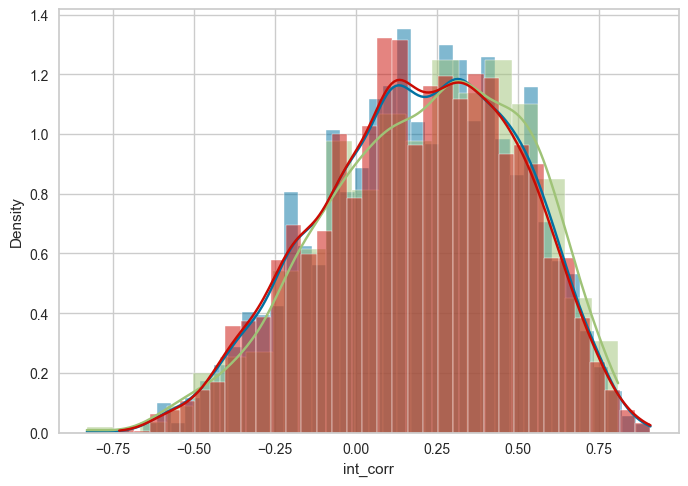

In [82]:
sns.histplot(data,x = "int_corr", kde = True, stat = "density")
sns.histplot(data[data["match"] == 1 ],x = "int_corr", kde = True, stat = "density")
sns.histplot(data[data["match"] == 0 ],x = "int_corr", kde = True, stat = "density")

In [52]:
data.groupby("match")["int_corr"].describe()

,count,mean,std,min,25%,50%,75%,max
match,,,,,,,,
0,6870.0,0.191822,0.302702,-0.73,-0.02,0.21,0.43,0.91
1,1350.0,0.217319,0.306995,-0.83,0.00,0.25,0.46,0.81


In [53]:
data["int_corr"].describe()

count    8220.000000
mean        0.196010
std         0.303539
min        -0.830000
25%        -0.020000
50%         0.210000
75%         0.430000
max         0.910000
Name: int_corr, dtype: float64

In [56]:
p1 = 0.217319
p2 = 0.191822
n1 = len(data[(data["match"] == 1)])
n2 = len(data[(data["match"] == 0)])
p = (n1*p1 + n2*p2)/(n1 + n2)

In [60]:
n1,n2

(1380, 6998)

In [57]:
t = (p1-p2)/(np.sqrt(p*(1-p)*(1/n1 + 1/n2)));t

2.1805753670948427

In [71]:
import pandas as pd

# read in data
rawdat = pd.read_csv('SpeedDating.csv', encoding= 'unicode_escape')

# remove variables that will not be used in analysis
dat = rawdat.drop(columns=['id', 'idg', 'condtn', 'round', 'position', 'positin1', 'order', 'partner', 'tuition', 'undergra', 'mn_sat'])

# ratings by other ppl
at00 = dat[['iid', 'pid', 'dec', 'gender', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']].copy()

# drop rows where all attributes were rated NA (col 4-9)
at00 = at00.fillna(1000)
at00['total'] = at00[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']].sum(axis=1)
at00 = at00[~(at00['total'] == 6000)]
at00[at00 == 1000] = pd.NA
at00['total'] = at00[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']].sum(axis=1, skipna=True)
at00 = at00[~(at00['total'] == 0)]

# attributes are evaluated for the opposite gender
at00['pgender'] = at00['gender'].apply(lambda x: 1 if x == 0 else 0)


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by participant ID and gender, and calculate the mean values for each attribute
test2 = at00.groupby(['pid', 'pgender']).agg(Decision=('dec', 'mean'),
                                              Attractive=('attr', 'mean'),
                                              Sincere=('sinc', 'mean'),
                                              Intelligent=('intel', 'mean'),
                                              Fun=('fun', 'mean'),
                                              Ambitious=('amb', 'mean'),
                                              Interest=('shar', 'mean')).reset_index()

# Remove rows with missing values
test2a = test2[['pid', 'pgender', 'Decision', 'Attractive']].dropna()
test2b = test2[['pid', 'pgender', 'Decision', 'Sincere']].dropna()
test2c = test2[['pid', 'pgender', 'Decision', 'Intelligent']].dropna()
test2d = test2[['pid', 'pgender', 'Decision', 'Fun']].dropna()
test2e = test2[['pid', 'pgender', 'Decision', 'Ambitious']].dropna()
test2f = test2[['pid', 'pgender', 'Decision', 'Interest']].dropna()

# Calculate the correlations between each attribute and the decision
coratr = np.corrcoef(test2a['Decision'], test2a['Attractive'])[0, 1]
corsin = np.corrcoef(test2b['Decision'], test2b['Sincere'])[0, 1]
corint = np.corrcoef(test2c['Decision'], test2c['Intelligent'])[0, 1]
corfun = np.corrcoef(test2d['Decision'], test2d['Fun'])[0, 1]
coramb = np.corrcoef(test2e['Decision'], test2e['Ambitious'])[0, 1]
corshar = np.corrcoef(test2f['Decision'], test2f['Interest'])[0, 1]

# Create six subplots for the attribute correlations
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

# Plot attractiveness correlation
sns.regplot(ax=axs[0, 0], x='Decision', y='Attractive', data=test2a, line_kws={'color': 'red'})
axs[0, 0].set(xlabel='Positive Response Rate', ylabel='Attractiveness Score', ylim=(0, 10), xlim=(0, 1))
axs[0, 0].set_title('(a) R = {:.3f}'.format(coratr))

# Plot sincerity correlation
sns.regplot(ax=axs[0, 1], x='Decision', y='Sincere', data=test2b, line_kws={'color': 'red'})
axs[0, 1].set(xlabel='Positive Response Rate', ylabel='Sincerity Score', ylim=(0, 10), xlim=(0, 1))
axs[0, 1].set_title('(b) R = {:.3f}'.format(corsin))

# Plot intelligence correlation
sns.regplot(ax=axs[0, 2], x='Decision', y='Intelligent', data=test2c, line_kws={'color': 'red'})
axs[0, 2].set(xlabel='Positive Response Rate', ylabel='Intelligence Score', ylim=(0, 10), xlim=(0, 1))
axs[0, 2].set_title('(c) R = {:.3f}'.format(corint))

# Plot Fun correlation
sns.regplot(ax=axs[1, 0], x='Decision', y='Fun', data=test2d, line_kws={'color': 'red'})
axs[1, 0].set(xlabel='Positive Response Rate', ylabel='Intelligence Score', ylim=(0, 10), xlim=(0, 1))
axs[1, 0].set_title('(d) R = {:.3f}'.format(corfun))

# Plot Ambitious correlation
sns.regplot(ax=axs[1, 1], x='Decision', y='Ambitious', data=test2e, line_kws={'color': 'red'})
axs[1, 1].set(xlabel='Positive Response Rate', ylabel='Intelligence Score', ylim=(0, 10), xlim=(0, 1))
axs[1, 1].set_title('(e) R = {:.3f}'.format(coramb))

# Plot Interest correlation
sns.regplot(ax=axs[1, 2], x='Decision', y='Interest', data=test2f, line_kws={'color': 'red'})
axs[1, 2].set(xlabel='Positive Response Rate', ylabel='Intelligence Score', ylim=(0, 10), xlim=(0, 1))
axs[1, 2].set_title('(f) R = {:.3f}'.format(corshar))



In [ ]:
# # Calculate the correlations between each attribute and the decision
# coratr = np.corrcoef(test2a['Decision'], test2a['Attractive'])[0, 1]
# corsin = np.corrcoef(test2b['Decision'], test2b['Sincere'])[0, 1]
# corint = np.corrcoef(test2c['Decision'], test2c['Intelligent'])[0, 1]
# corfun = np.corrcoef(test2d['Decision'], test2d['Fun'])[0, 1]
# coramb = np.corrcoef(test2e['Decision'], test2e['Ambitious'])[0, 1]
# corshar = np.corrcoef(test2f['Decision'], test2f['Interest'])[0, 1]

In [94]:
# np.corrcoef(test2a['Decision'], test2a['Attractive'])

## Selectivity wrt group size

### Women's selectivity

In [72]:
data[data["gender"] == 0].groupby(["condtn"])["dec"].describe()

,count,mean,std,min,25%,50%,75%,max
condtn,,,,,,,,
1,712.0,0.439607,0.496688,0.0,0.0,0.0,1.0,1.0
2,3472.0,0.350230,0.477111,0.0,0.0,0.0,1.0,1.0


We notice a diffrent in the proportion of women saying "yes" wrt group size (big vs small). We proceed to test the significant of these results.


$p_{1}$ the proportion of women saying yes in limited choice setup

$p_{2}$ the proportion of women saying yes in an extensive choice setup


In [73]:
p1 = 0.43960
p2 = 0.350230
n1 = len(data[(data["gender"] == 0) & (data["condtn"] == 1)])
n2 = len(data[(data["gender"] == 0) & (data["condtn"] == 2)])
p = (n1*p1 + n2*p2)/(n1 + n2)

$H_0$ : $p_{1} = p_{2} = p $
$\\$
$H_1$ : $p_{1}$ > $p_{2}$

The test statistic is 
$T = \frac{p_1-p_2}{\sqrt{p(1-p)}\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}$


Under $ H_0 :$ $T \approx N(0, 1)$



for $α = 5\%$,  $W = \{T > 1.64\}$

In [74]:
t = (p1-p2)/(np.sqrt(p*(1-p)*(1/n1 + 1/n2)));t

4.511093424068466

We have t = 4.51 > 1.64, so we reject the null hypothesis.
Women are more likely to say yes in limited choice situation, in other words they are less selective.

### Men's selectivity

In [75]:
data[data["gender"] == 1].groupby(["condtn"])["dec"].describe()

,count,mean,std,min,25%,50%,75%,max
condtn,,,,,,,,
1,722.0,0.480609,0.499970,0.0,0.0,0.0,1.0,1.0
2,3472.0,0.472926,0.499338,0.0,0.0,0.0,1.0,1.0


We do the same test for men


$p_{1}$ the proportion of men saying yes in limited choice setup

$p_{2}$ the proportion of men saying yes in an extensive choice setup


In [76]:
p1 = 0.480609
p2 = 0.472926
n1 = len(data[(data["gender"] == 1) & (data["condtn"] == 1)])
n2 = len(data[(data["gender"] == 1) & (data["condtn"] == 2)])
p = (n1*p1 + n2*p2)/(n1 + n2)

$H_0 : p_{1} = p_{2} = p$


$H_1 : p_{1} \ne p_{2}$

The test statistic is 
$T = \frac{p_1-p_2}{\sqrt{p(1-p)}\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}$


Under $ H_0 :$ $T \approx N(0, 1)$


for $α = 5\%$,  $W = \{|T| > 1.96\}$

In [77]:
t = (p1-p2)/(np.sqrt(p*(1-p)*(1/n1 + 1/n2)));t

0.37616798260726453

We have |t| = 0.37 < 1.96, so we can't reject the null hypothesis.
Men's selectivity doesn't change wrt the group size

## Would men date a woman that is more intelligent or ambitious than them ?

In [5]:
df1 = data_to_model.copy()

In [6]:
# more_intel = the partner is more intelligent
df1["woman_more_intel"] = df1["intel3_1_w"] > df1["intel3_1_m"]
df1["woman_more_amb"] = df1["amb3_1_w"] > df1["amb3_1_m"]

### Intelligence

In [80]:
temp = df1.groupby("woman_more_intel")["dec_m"].mean();temp

woman_more_intel
False    0.494824
True     0.428241
Name: dec_m, dtype: float64

We notice that it's more likely for a man to say "yes" when the woman is not more intelligent than him.


$p_{1}$ the proportion of men saying yes when their date is not smarter then them

$p_{2}$ the proportion of men saying yes when their date is smarter then them


In [81]:
p1 = temp[0]
p2 = temp[1]
n1 = len(df1[df1["woman_more_intel"] == False])
n2 = len(df1[df1["woman_more_intel"] == True])
p = (n1*p1 + n2*p2)/(n1 + n2)

$H_0$ : $p_{1} = p_{2} = p $
$\\$
$H_1$ : $p_{1}$ > $p_{2}$

The test statistic is 
$T = \frac{p_1-p_2}{\sqrt{p(1-p)}\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}$


Under $ H_0 :$ $T \approx N(0, 1)$


for $α = 5\%$,  $W = \{T > 1.64\}$

In [82]:
t = (p1-p2)/(np.sqrt(p*(1-p)*(1/n1 + 1/n2)));t

3.99033515257042

We have t = 5.89 > 1.64, so we reject the null hypothesis.
Men do not value women’s intelligence when it exceeds their own.

### Ambition

In [7]:
temp = df1.groupby("woman_more_amb")["dec_m"].mean();temp

woman_more_amb
False    0.492969
True     0.446921
Name: dec_m, dtype: float64

Same as before, we notice that it's more likely for a man to say "yes" when the woman is not more ambitious than him.


$p_{1}$ the proportion of men saying yes when their date is not ambitious then them

$p_{2}$ the proportion of men saying yes when their date is ambitious then them


In [8]:
p1 = temp[0]
p2 = temp[1]
n1 = len(df1[df1["woman_more_intel"] == False])
n2 = len(df1[df1["woman_more_intel"] == True])
p = (n1*p1 + n2*p2)/(n1 + n2)

We do the same test of significance

$H_0$ : $p_{1} = p_{2} = p $
$\\$
$H_1$ : $p_{1}$ > $p_{2}$


$T = \frac{p_1-p_2}{\sqrt{p(1-p)}\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}$

for α = 5%,  W = {T > 1.64}

In [9]:
t = (p1-p2)/(np.sqrt(p*(1-p)*(1/n1 + 1/n2)));t

2.758503241914721

We have t = 5.89 > 1.64, so we reject the null hypothesis.
Men do not value women’s ambition when it exceeds their own.

## Does the race influence the decesion ?

In [86]:
data_by_samerace = data[['wave', 'iid', 'gender', 'age','dec_o','dec','match',"samerace"]]
dict_wave_race = {}
for i in range(len(list_wave)):
    dict_wave_race[f"wave_{i+1}"] = data_by_samerace[data_by_samerace["wave"] == i+1]

### For women

In [87]:
data[data["gender"] == 0].groupby(["samerace"])["dec"].describe()

,count,mean,std,min,25%,50%,75%,max
samerace,,,,,,,,
0,2526.0,0.347189,0.476171,0.0,0.0,0.0,1.0,1.0
1,1658.0,0.393245,0.488618,0.0,0.0,0.0,1.0,1.0


We notice a diffrent in the proportion of women saying "yes" wrt the same race (1 if they both are from the same race 0 if ot ). We procude to test the significant of these results.


$p_{0}$ the proportion of women saying yes if they are both from the same race

$p_{1}$ the proportion of women saying yes if they are not from the same race


In [88]:
p0 = 0.347189
p1 = 0.393245
n0 = len(data[(data["gender"] == 0) & (data["samerace"] == 0)])
n1 = len(data[(data["gender"] == 0) & (data["samerace"] == 1)])
p = (n0*p0 + n1*p1)/(n0 + n1)

$H_0$ : $p_{1} = p_{2} = p $
$\\$
$H_1$ : $p_{1}$ > $p_{2}$

The test statistic is 
$T = \frac{p_1-p_2}{\sqrt{p(1-p)}\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}$


Under $ H_0 :$ $T \approx N(0, 1)$



for $α = 5\%$,  $W = \{T > 1.64\}$

In [89]:
t = (p1-p0)/(np.sqrt(p*(1-p)*(1/n0 + 1/n1)));t

3.025903041082406

We have t = 3.02 > 1.64, so we reject the null hypothesis.
Women are more likely to say yes if they find a partner from the same race.

### For men

In [90]:
data[data["gender"] == 1].groupby(["samerace"])["dec"].describe()

,count,mean,std,min,25%,50%,75%,max
samerace,,,,,,,,
0,2536.0,0.473975,0.499421,0.0,0.0,0.0,1.0,1.0
1,1658.0,0.474668,0.499509,0.0,0.0,0.0,1.0,1.0


We notice close proportions of men saying "yes" wrt the same race (1 if they both are from the same race 0 if ot ). We procude to test the significant of these results.

$p_{0}$ the proportion of men saying yes if they are both from the same race

$p_{1}$ the proportion of men saying yes if they are not from the same race


In [91]:
p0 = 0.473975
p1 = 0.474668
n0 = len(data[(data["gender"] == 1) & (data["samerace"] == 0)])
n1 = len(data[(data["gender"] == 1) & (data["samerace"] == 1)])
p = (n1*p1 + n0*p0)/(n1 + n0)

$H_0 : p_{1} = p_{2} = p$


$H_1 : p_{1} \ne p_{2}$

The test statistic is 
$T = \frac{p_1-p_2}{\sqrt{p(1-p)}\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}$


Under $ H_0 :$ $T \approx N(0, 1)$


for $α = 5\%$,  $W = \{|T| > 1.96\}$

In [92]:
t = (p1-p0)/(np.sqrt(p*(1-p)*(1/n0 + 1/n1)));t

0.04394329771945641

We have |t| = 0.04 < 1.64, so we can't reject the null hypothesis.
Men don't take race into their decision 

## Women & Men's most desired attributes in the opposite sex

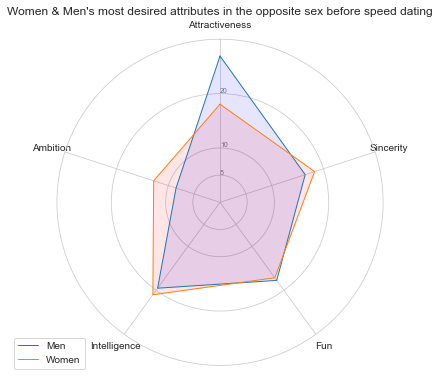

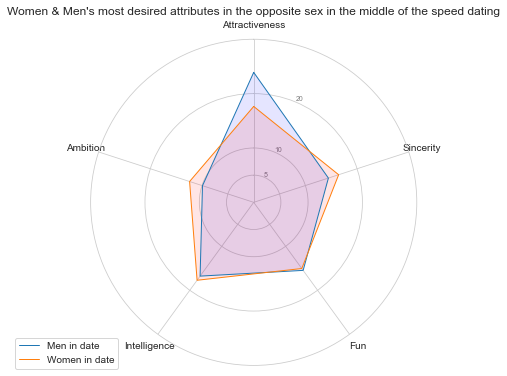

In [7]:
df = data.copy()
# Set data
dp = pd.DataFrame({
'group': ['Men','Women','Ms','Ws'],
'Attractiveness': [data[df['gender']==1]['attr1_1'].mean(), df[df['gender']==0]['attr1_1'].mean(), df[df['gender']==1]['attr1_s'].mean(), df[df['gender']==0]['attr1_s'].mean()],
'Sincerity': [df[df['gender']==1]['sinc1_1'].mean(), df[df['gender']==0]['sinc1_1'].mean(), df[df['gender']==1]['sinc1_s'].mean(), df[df['gender']==0]['sinc1_s'].mean()],
'Fun': [df[df['gender']==1]['fun1_1'].mean(), df[df['gender']==0]['fun1_1'].mean(), df[df['gender']==1]['fun1_s'].mean(), df[df['gender']==0]['fun1_s'].mean()],
'Intelligence': [df[df['gender']==1]['intel1_1'].mean(), df[df['gender']==0]['intel1_1'].mean(), df[df['gender']==1]['intel1_s'].mean(), df[df['gender']==0]['intel1_s'].mean()],
'Ambition': [df[df['gender']==1]['amb1_1'].mean(), df[df['gender']==0]['amb1_1'].mean(), df[df['gender']==1]['amb1_s'].mean(), df[df['gender']==0]['amb1_s'].mean()],
})
 
# ------- PART 1: Create background
 
# number of variable
categories=list(dp)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([5,10,20], ["5","10","20"], color="grey", size=7)
plt.ylim(0,30)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=dp.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Men")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=dp.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Women")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

#title
plt.title("Women & Men's most desired attributes in the opposite sex before speed dating")

# Show the graph
plt.show()


#----------------------2nd plot--------------
fig2 = plt.figure(figsize=(6, 6))
ax2 = fig2.add_subplot(111, polar=True)

# If you want the first axis to be on top:
ax2.set_theta_offset(np.pi / 2)
ax2.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([5,10,20], ["5","10","20"], color="grey", size=7)
plt.ylim(0,30)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=dp.loc[2].drop('group').values.flatten().tolist()
values += values[:1]
ax2.plot(angles, values, linewidth=1, linestyle='solid', label="Men in date")
ax2.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=dp.loc[3].drop('group').values.flatten().tolist()
values += values[:1]
ax2.plot(angles, values, linewidth=1, linestyle='solid', label="Women in date")
ax2.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

#title
plt.title("Women & Men's most desired attributes in the opposite sex in the middle of the speed dating")

# Show the graph
plt.show()

We can see that before the speedating, Women put greater weight on the intelligence of partner, while men respond more to physical attractiveness. But during the speedating, the women reduced their expectations of the partner's intelligence while the men's opinion remained practically unchanged.

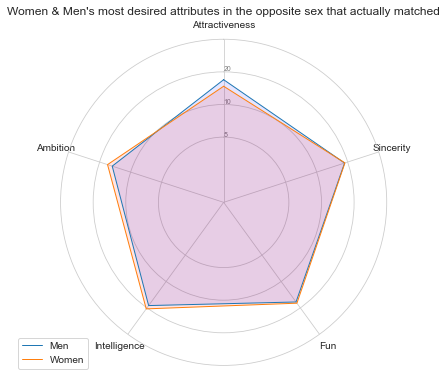

In [8]:
# Set data
drp = pd.DataFrame({
'group': ['Men','Women'],
'Attractiveness': [df[(df['gender']==1) & (df['match']==1)]['attr'].mean(), df[(df['gender']==0) & (df['match']==1)]['attr'].mean()],
'Sincerity': [df[(df['gender']==1) & (df['match']==1)]['sinc'].mean(), df[(df['gender']==0) & (df['match']==1)]['sinc'].mean()],
'Fun': [df[(df['gender']==1) & (df['match']==1)]['fun'].mean(), df[(df['gender']==0) & (df['match']==1)]['fun'].mean()],
'Intelligence': [df[(df['gender']==1) & (df['match']==1)]['intel'].mean(), df[(df['gender']==0) & (df['match']==1)]['intel'].mean()],
'Ambition': [df[(df['gender']==1) & (df['match']==1)]['amb'].mean(), df[(df['gender']==0) & (df['match']==1)]['amb'].mean()],
})
 
# ------- PART 1: Create background
 
# number of variable
categories=list(drp)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([4,6,8], ["5","10","20"], color="grey", size=7)
plt.ylim(0,10) 
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=drp.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Men")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=drp.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Women")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

#title
plt.title("Women & Men's most desired attributes in the opposite sex that actually matched")

# Show the graph

plt.show()

When it comes to the people who actually matched, we can see that no particular attribute stands out and that in reality what's more important is a balance in all attributes.

# Modeling

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [26]:
def benchmark(X,y,model = LogisticRegression(), test_size = 0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=42)
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    print("Benchmark using a " + str(model) + " model and test size of " + str(test_size)+ "%")
    print("Accuracy on the training data:", accuracy_train)
    print("Accuracy on the test data:", accuracy_test)

## PCA

As our dataset is fairly large, containing 100 columns, we start our analysis using Principal Component Analysis (PCA). PCA is a common technique used in data science to reduce the dimensionality of the data while retaining most of the relevant information. By reducing the number of variables, PCA can help us to better understand the underlying structure of the data, identify patterns and correlations, and potentially improve the performance of our machine learning models. Therefore, applying PCA to our dataset can be an effective way to deal with the challenge of high-dimensional data and improve the quality of our analysis.

### Without PCA

First we will do a bench mark without using PCA.

In [134]:
df = data_small[numerical_variables + [x for x in categorical_variables if x not in ["from","career","field","dec","dec_o","match"]]]
X = df.copy()
y = data_small["match"]

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = np.nan_to_num(X_std, nan=0)

In [135]:
benchmark(X_std,y)

Benchmark using a LogisticRegression() and test size of 0.2%
Accuracy on the training data: 0.8676514473291554
Accuracy on the test data: 0.8514319809069213


### PCA without categorical variables

As a start, we will only work with numerical variables.

In [136]:
df = data_small[numerical_variables]

<AxesSubplot: >

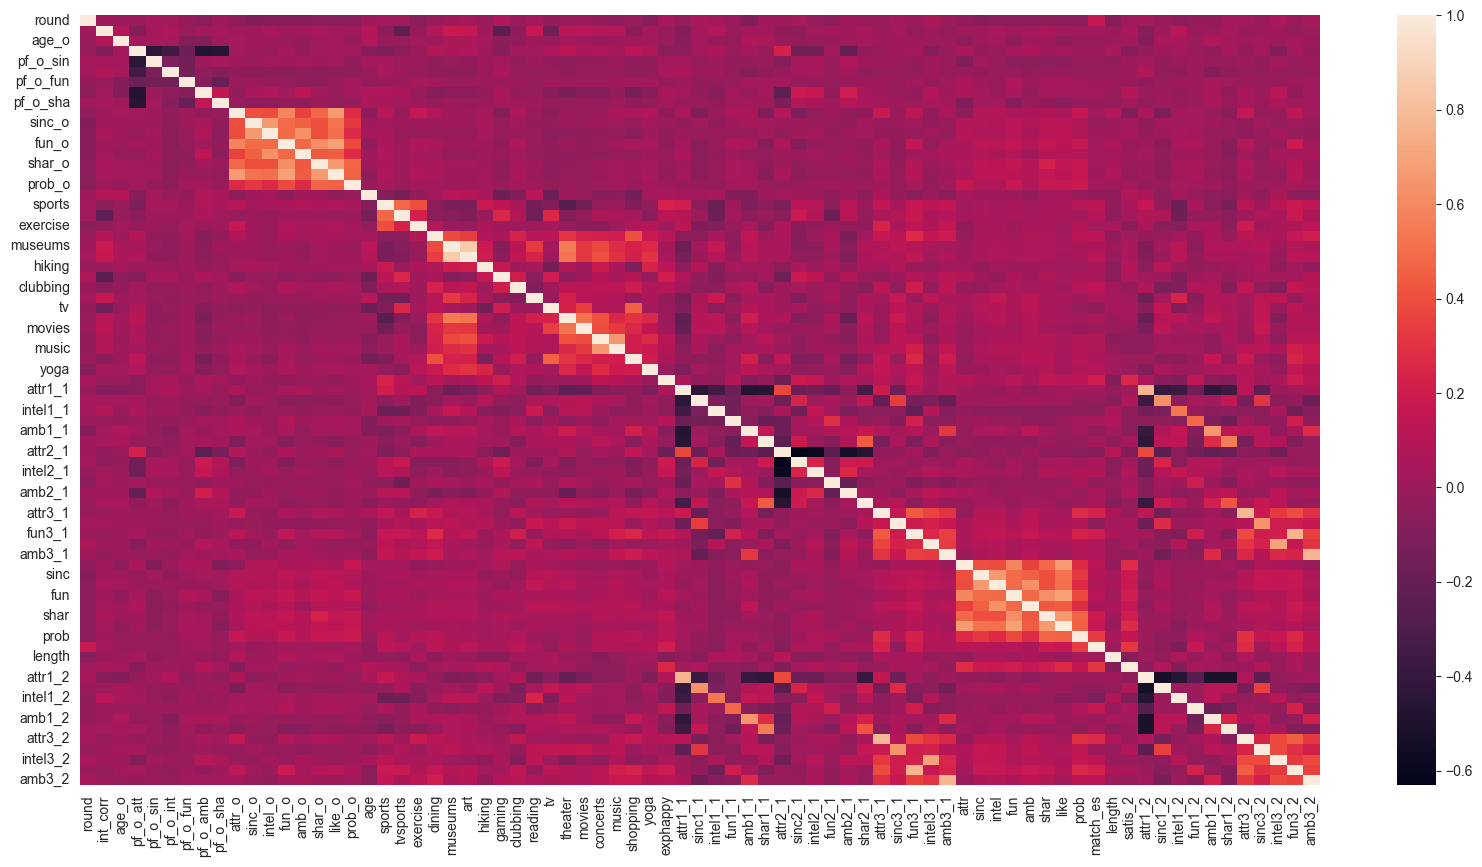

In [137]:
plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr())

We can see groups of highly correlated variables in the heatmap, which indicates multicollinearity between these variables. Multicollinearity can cause issues in statistical models, such as inflated standard errors and unreliable coefficients. This is where PCA can be useful in reducing the dimensionality of the dataset while still retaining the most important information.

In [138]:
X = df.copy()
y = data_small["match"]
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = np.nan_to_num(X_std, nan=0)

In [139]:
pca = PCA()
pca.fit(X_std)

PCA()

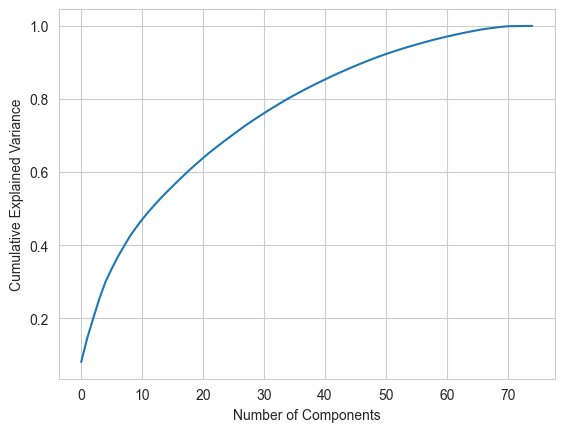

In [140]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [141]:
n_components = 65 
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_std)

In [142]:
# We will benchmark the performance of out analysis using a logistic regression model
benchmark(X_pca,y)

Benchmark using a LogisticRegression() and test size of 0.2%
Accuracy on the training data: 0.8627275440167115
Accuracy on the test data: 0.8544152744630071


We can see that a logistic regression model trained on our "X_pca" performe a bit better than the base model.

### PCA with categorical variables

To use categorical variables in PCA we would need to turn them into numerical variables through onehot or ordinal encoding. However, that was already done. We will only remove **"from"**, **"career"**, **"field"** and we will use their encoded counterparts **"from_c"**, **"career_c"**, **"field_cd"**. 

We will also remove the variables **"dec"** and **"dec_o"** because they are a dead giveaway for the target variable (match = dec * dec_o)

In [21]:
print(categorical_variables)

['gender', 'condtn', 'wave', 'match', 'samerace', 'dec_o', 'field', 'undergra', 'from', 'from_c', 'career', 'dec', 'race_o', 'met_o', 'field_cd', 'race', 'imprace', 'imprelig', 'zipcode', 'goal', 'date', 'go_out', 'career_c', 'met', 'numdat_2']


In [22]:
df = data_small[numerical_variables + [x for x in categorical_variables if x not in ["from","career","field","dec","dec_o","match"]]]

In [27]:
X = df.copy()
y = data_small["match"]
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = np.nan_to_num(X_std, nan=0)

In [28]:
pca = PCA()
pca.fit(X_std)

PCA()

In [30]:
df.shape

(8378, 95)

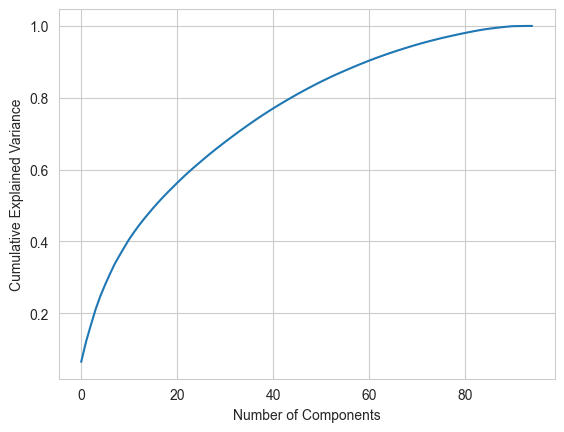

In [147]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [148]:
n_components = 90 
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_std)

In [149]:
# logistic regression benchmark
benchmark(X_pca,y)

Benchmark using a LogisticRegression() and test size of 0.2%
Accuracy on the training data: 0.8672038197552969
Accuracy on the test data: 0.8520286396181385


### Summary

|       | Without PCA | PCA without categorical variables | PCA with categorical variables |
|-------|----------|----------|----------|
| Accuracy on the training data     | 0.8676 | 0.8627 | 0.8672 |
| Accuracy on the test data     | 0.8514 | 0.8544 | 0.8520 |



Overall, PCA improved accuracy on the test dataset and thus reducing overfitting. However the increase in accuracy wasn't significant.

## A more practical model

So far we were working with **data_small** as our dataset to predect matching. However **data_small** contain information specefic to the speed dating experiement. Building a model that predect matching for this specefic setup doesn't seems interesting, that's why we decided to create a new dataset called **data_to_model** that we think will lead to build a more usefull and practical model to predict matches because it only uses backround information about the man and woman involved in the date.

In [4]:
data_to_model.head()

,id,condtn,int_corr,samerace,match,race_m,race_w,field_cd_m,field_cd_w,undergra_m,...,amb_m,amb_w,shar_m,shar_w,like_m,like_w,prob_m,prob_w,met_m,met_w
0,"(11, 1)",1,0.14,0,0,2.0,4.0,8.0,1.0,0,...,8.0,6.0,6.0,5.0,7.0,7.0,4.0,6.0,2.0,2.0
1,"(12, 1)",1,0.54,0,0,2.0,4.0,1.0,1.0,0,...,7.0,5.0,5.0,6.0,8.0,7.0,4.0,5.0,2.0,1.0
2,"(13, 1)",1,0.16,1,1,4.0,4.0,1.0,1.0,0,...,10.0,5.0,10.0,7.0,10.0,7.0,10.0,NaN,1.0,1.0
3,"(14, 1)",1,0.61,0,1,2.0,4.0,1.0,1.0,0,...,9.0,6.0,8.0,8.0,7.0,7.0,7.0,6.0,2.0,2.0
4,"(15, 1)",1,0.21,0,1,3.0,4.0,1.0,1.0,0,...,9.0,6.0,7.0,6.0,8.0,6.0,6.0,6.0,2.0,2.0


In **data_to_model** a date is identified by an id that combine iid and pid. Unlike the original dataset, in **data_to_model** a date is represented only once. Each row/date contain information related to the experiemental setup and background information about the man and woman involved. 

In [5]:
# print(data_to_model.columns.tolist())

We will only use data that is independent than the experiement in our modeling.

In [6]:
df = data_to_model.drop(columns = ['condtn','int_corr', 'samerace','attr_m', 'attr_w', 'sinc_m', 'sinc_w', 'intel_m', 'intel_w', 'fun_m', 'fun_w', 'amb_m', 'amb_w', 'shar_m', 'shar_w', 'like_m', 'like_w', 'prob_m', 'prob_w', 'met_m', 'met_w'])

We will be using a package called **pycaret** that make it easy to compare the performance of multiple models.

In [8]:
from pycaret.classification import *

In [9]:
X = df.drop(columns = ["id",'dec_m','dec_w'])
target = "match"

In [10]:
X_train,X_test= train_test_split(X, test_size=0.1, random_state = 0)

In [11]:
s = ClassificationExperiment()
s.setup(X_train, target = target,test_data = X_test)

,Description,Value
0,Session id,5820
1,Target,match
2,Target type,Binary
3,Original data shape,"(4194, 93)"
4,Transformed data shape,"(4194, 93)"
5,Transformed train set shape,"(3774, 93)"
6,Transformed test set shape,"(420, 93)"
7,Numeric features,92
8,Rows with missing values,24.7%
9,Preprocess,True


In [12]:
best = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8408,0.6921,0.0927,0.5939,0.1597,0.1197,0.1863,0.4410
gbc,Gradient Boosting Classifier,0.8408,0.7012,0.0651,0.6119,0.1162,0.0880,0.1580,1.2600
rf,Random Forest Classifier,0.8384,0.6932,0.0456,0.5259,0.0826,0.0599,0.1160,0.7780
et,Extra Trees Classifier,0.8381,0.6973,0.0569,0.5405,0.1025,0.0735,0.1337,0.6730
lr,Logistic Regression,0.8370,0.5128,0.0000,0.0000,0.0000,0.0000,0.0000,0.7310
ridge,Ridge Classifier,0.8370,0.0000,0.0049,0.3000,0.0096,0.0065,0.0296,0.0820
lda,Linear Discriminant Analysis,0.8370,0.6456,0.0603,0.5108,0.1068,0.0748,0.1297,0.2290
dummy,Dummy Classifier,0.8370,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1350
lightgbm,Light Gradient Boosting Machine,0.8360,0.6966,0.1302,0.4957,0.2044,0.1466,0.1887,0.4330
nb,Naive Bayes,0.8336,0.5626,0.0049,0.0867,0.0091,-0.0003,-0.0030,0.0790


In [33]:
# s.evaluate_model(best)

In [17]:
predictions1 = s.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,str,0.8071,0.6796,0.0267,0.2000,0.0471,0.0053,0.0087


In [164]:
pred = predict_model(best, data=X_train.drop(columns = [target]))
accuracy_score(X_train[target], pred[['Label']])

0.9520402755696873

We didn't get a good score, so we will try a different approach. We know that **match = dec_w * dec_m** so we will try predecting **dec_w** and **dec_m**.

In [165]:
X_m = df.drop(columns = ["id",'match','dec_w'])

In [166]:
X_train_m,X_test_m= train_test_split(X_m, test_size=0.1, random_state = 0)

In [167]:
s_m = setup(X_train_m, target = "dec_m", fix_imbalance = True)

,Description,Value
0,session_id,1914
1,Target,dec_m
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3774, 93)"
5,Missing Values,True
6,Numeric Features,29
7,Categorical Features,63
8,Ordinal Features,False
9,High Cardinality Features,False


In [168]:
best_m = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7054,0.7719,0.6938,0.6871,0.6900,0.4094,0.4098,0.7410
ridge,Ridge Classifier,0.6990,0.0000,0.7026,0.6750,0.6883,0.3974,0.3980,0.2690
et,Extra Trees Classifier,0.6899,0.7555,0.6434,0.6846,0.6625,0.3762,0.3776,0.9490
lightgbm,Light Gradient Boosting Machine,0.6872,0.7569,0.6570,0.6748,0.6655,0.3719,0.3724,0.5740
rf,Random Forest Classifier,0.6812,0.7502,0.6250,0.6785,0.6496,0.3581,0.3600,0.7340
gbc,Gradient Boosting Classifier,0.6789,0.7468,0.6530,0.6642,0.6582,0.3555,0.3559,2.0510
ada,Ada Boost Classifier,0.6395,0.6937,0.6131,0.6208,0.6165,0.2765,0.2769,0.6790
dt,Decision Tree Classifier,0.6001,0.5993,0.5843,0.5767,0.5803,0.1985,0.1987,0.3460
qda,Quadratic Discriminant Analysis,0.5710,0.5587,0.3246,0.6245,0.3960,0.1199,0.1505,0.7350
knn,K Neighbors Classifier,0.5642,0.5681,0.5492,0.5397,0.5433,0.1268,0.1273,0.4560


In [169]:
predictions_m = predict_model(best_m, data=X_test_m.drop(columns = ["dec_m"]))

In [170]:
accuracy_score(X_test_m['dec_m'], predictions_m[['Label']])

0.6928571428571428

In [171]:
pred_m = predict_model(best_m, data=X_train_m.drop(columns = ["dec_m"]))
accuracy_score(X_train_m["dec_m"], pred_m[['Label']])

0.7978272390037096

In [175]:
X_w = df.drop(columns = ["id",'match','dec_m'])

In [176]:
X_train_w,X_test_w= train_test_split(X_w, test_size=0.1, random_state = 0)

In [220]:
s_w = setup(X_train_w, target = "dec_w", fix_imbalance = True)

,Description,Value
0,session_id,210
1,Target,dec_w
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3774, 93)"
5,Missing Values,True
6,Numeric Features,29
7,Categorical Features,63
8,Ordinal Features,False
9,High Cardinality Features,False


In [178]:
best_w = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7266,0.7737,0.4687,0.6680,0.5501,0.3625,0.3746,1.0650
lda,Linear Discriminant Analysis,0.7255,0.7877,0.6914,0.6020,0.6430,0.4220,0.4251,0.9050
lightgbm,Light Gradient Boosting Machine,0.7224,0.7701,0.5005,0.6466,0.5631,0.3646,0.3718,1.1130
gbc,Gradient Boosting Classifier,0.7217,0.7714,0.4846,0.6494,0.5540,0.3580,0.3668,3.1390
rf,Random Forest Classifier,0.7149,0.7741,0.4125,0.6641,0.5078,0.3224,0.3410,0.8330
ridge,Ridge Classifier,0.7122,0.0000,0.6840,0.5832,0.6292,0.3966,0.4003,0.2630
ada,Ada Boost Classifier,0.6675,0.6939,0.5047,0.5371,0.5199,0.2662,0.2668,0.8920
dummy,Dummy Classifier,0.6429,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2160
nb,Naive Bayes,0.6354,0.5573,0.1221,0.4561,0.1727,0.0487,0.0664,0.2830
dt,Decision Tree Classifier,0.6233,0.5999,0.5166,0.4735,0.4935,0.1947,0.1955,0.3510


In [191]:
predictions_w = predict_model(best_w, data=X_test_w.drop(columns = ["dec_w"]))

In [180]:
accuracy_score(X_test_w["dec_w"], predictions_w[['Label']])

0.7166666666666667

In [209]:
pred_w = predict_model(best_w, data=X_train_w.drop(columns = ["dec_w"]))
accuracy_score(X_train_w["dec_w"], pred_w[['Label']])

0.9130895601483837

In [182]:
accuracy_score(X_train["match"], pred_w[['Label']] * pred_m[['Label']])

0.9014308426073132

In [183]:
accuracy_score(X_test["match"], predictions_m[['Label']] * predictions_w[['Label']])

0.8095238095238095

In [196]:
best_m

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [207]:
best_w

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=8758, verbose=0,
                     warm_start=False)

In [208]:
pred_m = predict_model(best_w)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7123,0.7644,0.4916,0.6458,0.5583,0.3507,0.3578


In [215]:
pred_m["Label"]

0       1
1       0
2       0
3       0
4       0
       ..
1128    1
1129    0
1130    1
1131    1
1132    0
Name: Label, Length: 1133, dtype: int32

In [216]:
pred_w["Label"]

57      0
3068    1
415     0
248     0
170     0
       ..
1033    0
3264    0
1653    0
2607    0
2732    0
Name: Label, Length: 3774, dtype: int32

In [219]:
3774/(1133 + 3774)

0.7691053596902384

In [201]:
X_train_w.head()

,race_m,race_w,field_cd_m,field_cd_w,undergra_m,undergra_w,imprace_m,imprace_w,imprelig_m,imprelig_w,...,attr3_1_w,sinc3_1_m,sinc3_1_w,fun3_1_m,fun3_1_w,intel3_1_m,intel3_1_w,amb3_1_m,amb3_1_w,dec_w
57,2.0,4.0,8.0,1.0,0,0.0,8.0,1.0,8.0,1.0,...,5.0,8.0,7.0,6.0,8.0,8.0,9.0,9.0,5.0,0
3068,2.0,2.0,8.0,1.0,1,1.0,7.0,1.0,2.0,1.0,...,8.0,6.0,10.0,10.0,9.0,7.0,7.0,8.0,5.0,1
415,6.0,2.0,1.0,11.0,0,0.0,1.0,10.0,1.0,10.0,...,6.0,7.0,10.0,6.0,10.0,7.0,9.0,7.0,10.0,0
248,2.0,2.0,3.0,1.0,0,0.0,3.0,2.0,3.0,4.0,...,7.0,9.0,8.0,8.0,9.0,9.0,8.0,9.0,8.0,0
170,2.0,2.0,8.0,11.0,0,0.0,2.0,10.0,3.0,2.0,...,7.0,8.0,9.0,5.0,7.0,7.0,8.0,7.0,6.0,0


In [203]:
print(pred_m.columns.tolist())

['zipcode_m', 'zipcode_w', 'career_c_m', 'from_c_m', 'from_c_w', 'attr1_1_m', 'attr1_1_w', 'sinc1_1_m', 'sinc1_1_w', 'intel1_1_m', 'intel1_1_w', 'fun1_1_m', 'fun1_1_w', 'amb1_1_m', 'amb1_1_w', 'shar1_1_m', 'shar1_1_w', 'attr2_1_m', 'attr2_1_w', 'sinc2_1_m', 'sinc2_1_w', 'intel2_1_m', 'intel2_1_w', 'fun2_1_m', 'fun2_1_w', 'amb2_1_m', 'amb2_1_w', 'shar2_1_m', 'shar2_1_w', 'race_m_1.0', 'race_m_2.0', 'race_m_3.0', 'race_m_4.0', 'race_m_6.0', 'race_w_1.0', 'race_w_2.0', 'race_w_3.0', 'race_w_4.0', 'race_w_6.0', 'field_cd_m_1.0', 'field_cd_m_10.0', 'field_cd_m_11.0', 'field_cd_m_12.0', 'field_cd_m_13.0', 'field_cd_m_14.0', 'field_cd_m_15.0', 'field_cd_m_16.0', 'field_cd_m_17.0', 'field_cd_m_18.0', 'field_cd_m_2.0', 'field_cd_m_3.0', 'field_cd_m_4.0', 'field_cd_m_5.0', 'field_cd_m_6.0', 'field_cd_m_7.0', 'field_cd_m_8.0', 'field_cd_m_9.0', 'field_cd_m_not_available', 'field_cd_w_1.0', 'field_cd_w_10.0', 'field_cd_w_11.0', 'field_cd_w_13.0', 'field_cd_w_14.0', 'field_cd_w_15.0', 'field_cd_w_1

In [190]:
X_train_m.shape

(3774, 93)